In [1]:
from PyPDF2 import PdfReader
import PyPDF2
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import google.generativeai as genai
from langchain.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain
from langchain.prompts import PromptTemplate
from dotenv import load_dotenv

In [2]:
def readTeethPdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_pages = len(reader.pages)
        print(num_pages)
        text = ''
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

In [3]:
def chunksTeethRepository(text):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
    chunks = text_splitter.split_text(text)
    return chunks

In [4]:
def VectorTeeth(text_chunks):
    embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
    vector_store = FAISS.from_texts(text_chunks, embedding=embeddings)
    vector_store.save_local("D:/GAI/Teeth_index")

In [5]:
def get_conversational_chain():

    prompt_template = """
    Answer the question as detailed as possible from the provided context, 
    make sure to provide all the details, 
    if the answer is not in
    provided context just say, 
    "answer is not available in the context", don't provide the wrong answer\n\n
    Context:\n {context}?\n
    Question: \n{question}\n

    Answer:
    """

    model = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.3)

    prompt = PromptTemplate(template = prompt_template, input_variables = ["context", "question"])
    chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

    return chain

In [6]:
FAISS.allow_dangerous_deserialization = True
def Response(user_question):
    embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
    #new_db = FAISS.load_local("D:/GAI/faiss_index", embeddings)
    new_db = FAISS.load_local("D:/GAI/Teeth_index", embeddings, allow_dangerous_deserialization=True)
    #new_db.allow_dangerous_deserialization = True
    docs = new_db.similarity_search(user_question)

    chain = get_conversational_chain()

    
    response = chain(
        {"input_documents":docs, "question": user_question}
        , return_only_outputs=True)

    #print(response)
    #print("=======")
    #print(response["output_text"])
    return response["output_text"]
    #st.write("Reply: ", response["output_text"])

In [7]:
TeethInfo = readTeethPdf('D:\\teeth\\dataset\\TrainSet.pdf')
print(TeethInfo)

8
15 Tooth Problems  
1- Toothache  
You've made a dentist  appointment, and it can't come soon enough. Meanwhile, it can help to rinse your 
mouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain 
reliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that 
you have an abscess, a more serious problem. See your dentist as soon as possible. You may 
need  antibiotics  as well as other treatments.  
2- Stained Teeth  
Your teeth are like your laundry: The right approach will remove many stains. Foods, medications, 
tobacco, and trauma are some of the things that can discolor your teeth.   You have three options for 
whitening them. Your dentist can use a whitening agent an d a special light. Or you can bleach them at 
home with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste 
and whitening rinses, only remove surface stains.  
3- Cavities  
These 

In [8]:
TeethChunks = chunksTeethRepository(TeethInfo)
print(TeethChunks)

['15 Tooth Problems  \n1- Toothache  \nYou\'ve made a dentist  appointment, and it can\'t come soon enough. Meanwhile, it can help to rinse your \nmouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain \nreliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that \nyou have an abscess, a more serious problem. See your dentist as soon as possible. You may \nneed  antibiotics  as well as other treatments.  \n2- Stained Teeth  \nYour teeth are like your laundry: The right approach will remove many stains. Foods, medications, \ntobacco, and trauma are some of the things that can discolor your teeth.   You have three options for \nwhitening them. Your dentist can use a whitening agent an d a special light. Or you can bleach them at \nhome with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste \nand whitening rinses, only remove surface stains.  \n3- Ca

In [9]:
VectorTeeth(TeethChunks)

In [13]:
Question = input("Ask a Question About Teeth Disease: ")
Answer=Response(Question)
print("Answer: " + Answer)

Ask a Question About Teeth Disease:  What treatments are available for a chipped tooth?


Answer: The treatments available for a chipped tooth are a crown, bonding with a strong resin material to replace the area that chipped, a root canal followed by a veneer or crown, or fillings.


In [112]:
import pandas as pd
df = pd.read_csv('D:\\teeth\\dataset\\testDataCSV.csv')

In [97]:
df.head()

,Symptom 1,Symptom 2,Symptom 3,Disease,Treatment
0,a cracked tooth,gum disease,worn-down fillings or crowns,dentin hypersensitivity,mouthwash
1,a cracked tooth,worn-down fillings or crowns,gum disease,dentin hypersensitivity,mouthwash
2,worn-down fillings or crowns,gum disease,a cracked tooth,dentin hypersensitivity,mouthwash
3,worn-down fillings or crowns,a cracked tooth,gum disease,dentin hypersensitivity,mouthwash
4,Holes or pits in your teeth,Pain when you bite down,"Black, white, or brown tooth stains",cavity,Brush your teeth with warm water


In [101]:
testData=df.values

In [135]:
ActualDisease=[]
PredictedDisease=[]
ActualTreatment=[]
PredictedTreatment=[]
t=testData
for i in range(0, 29):
    print(str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Disease)")
    dis=str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Disease)"
    print("Actual Disease: " + str(t[i][3]))
    Answer=Response(dis)
    print("Predicted Disease: " + Answer)
    ActualDisease.append(str(t[i][3]))
    PredictedDisease.append(Answer)
    print(str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Treatment)")
    tr=str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Treatment)"
    print("Actual Treatment: " + str(t[i][4]))
    Answer=Response(tr)
    print("Predicted Treatment: " + Answer)
    ActualTreatment.append(str(t[i][4]))
    PredictedTreatment.append(Answer)
    print(i)
    print("===========")
    i=i+1
        

a cracked tooth  gum disease   worn-down fillings or crowns (Disease)
Actual Disease: dentin hypersensitivity
Predicted Disease: dentin hypersensitivity
a cracked tooth  gum disease   worn-down fillings or crowns (Treatment)
Actual Treatment: mouthwash
Predicted Treatment: mouthwash
0
a cracked tooth  worn-down fillings or crowns   gum disease (Disease)
Actual Disease: dentin hypersensitivity
Predicted Disease: dentin hypersensitivity
a cracked tooth  worn-down fillings or crowns   gum disease (Treatment)
Actual Treatment: mouthwash
Predicted Treatment: mouthwash
1
worn-down fillings or crowns  gum disease   a cracked tooth (Disease)
Actual Disease: dentin hypersensitivity
Predicted Disease: Dentin hypersensitivity
worn-down fillings or crowns  gum disease   a cracked tooth (Treatment)
Actual Treatment: mouthwash
Predicted Treatment: mouthwash
2
worn-down fillings or crowns  a cracked tooth   gum disease (Disease)
Actual Disease: dentin hypersensitivity
Predicted Disease: dentin hypers

Predicted Treatment: mouthwash
3
Holes or pits in your teeth  Pain when you bite down   Black, white, or brown tooth stains (Disease)
Actual Disease: cavity
Predicted Disease: cavity
Holes or pits in your teeth  Pain when you bite down   Black, white, or brown tooth stains (Treatment)
Actual Treatment: Brush your teeth with warm water
Predicted Treatment: Brush your teeth with warm water
4
Pain when you bite down  Black, white, or brown tooth stains   Holes or pits in your teeth (Disease)
Actual Disease: cavity
Predicted Disease: cavity
Pain when you bite down  Black, white, or brown tooth stains   Holes or pits in your teeth (Treatment)
Actual Treatment: Brush your teeth with warm water
Predicted Treatment: Brush your teeth with warm water
5
Pain when you bite down  Holes or pits in your teeth   Black, white, or brown tooth stains (Disease)
Actual Disease: cavity
Predicted Disease: cavity
Pain when you bite down  Holes or pits in your teeth   Black, white, or brown tooth stains (Treat

Predicted Treatment: Brush your teeth with warm water
6
Cracked or chipped teeth  Grooves on your teeth’s surface   Yellowish discoloration (Disease)
Actual Disease: Tooth Erosion
Predicted Disease: Tooth Erosion
Cracked or chipped teeth  Grooves on your teeth’s surface   Yellowish discoloration (Treatment)
Actual Treatment: Chew sugar-free gum
Predicted Treatment: Answer is not available in the context
7
Grooves on your teeth’s surface  Yellowish discoloration   Cracked or chipped teeth (Disease)
Actual Disease: Tooth Erosion
Predicted Disease: Tooth Erosion
Grooves on your teeth’s surface  Yellowish discoloration   Cracked or chipped teeth (Treatment)
Actual Treatment: Chew sugar-free gum
Predicted Treatment: Chew sugar-free gum
8
Grooves on your teeth’s surface  Cracked or chipped teeth   Yellowish discoloration (Disease)
Actual Disease: Tooth Erosion
Predicted Disease: Tooth Erosion
Grooves on your teeth’s surface  Cracked or chipped teeth   Yellowish discoloration (Treatment)
Actu

StopCandidateException: finish_reason: SAFETY
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: MEDIUM
}


In [136]:
print(len(ActualDisease))
print(len(PredictedDisease))
print(len(ActualTreatment))
print(len(PredictedTreatment))


10
10
9
9


In [137]:
for i in range(9, 29):
    print(str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Disease)")
    dis=str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Disease)"
    print("Actual Disease: " + str(t[i][3]))
    Answer=Response(dis)
    print("Predicted Disease: " + Answer)
    ActualDisease.append(str(t[i][3]))
    PredictedDisease.append(Answer)
    print(str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Treatment)")
    tr=str(t[i][0]) + "  "  + str(t[i][1])  + "   "  + str(t[i][2]) + " (Treatment)"
    print("Actual Treatment: " + str(t[i][4]))
    Answer=Response(tr)
    print("Predicted Treatment: " + Answer)
    ActualTreatment.append(str(t[i][4]))
    PredictedTreatment.append(Answer)
    print(i)
    print("===========")
    i=i+1

Grooves on your teeth’s surface  Cracked or chipped teeth   Yellowish discoloration (Disease)
Actual Disease: Tooth Erosion
Predicted Disease: Tooth Erosion
Grooves on your teeth’s surface  Cracked or chipped teeth   Yellowish discoloration (Treatment)
Actual Treatment: Chew sugar-free gum
Predicted Treatment: Chew sugar-free gum
9
pain  sore throat   bleeding (Disease)
Actual Disease: Mouth Sores
Predicted Disease: Mouth Sores
pain  sore throat   bleeding (Treatment)
Actual Treatment: Cryotherapy
Predicted Treatment: Cryotherapy
10
sore throat  bleeding   pain (Disease)
Actual Disease: Mouth Sores
Predicted Disease: Mouth Sores
sore throat  bleeding   pain (Treatment)
Actual Treatment: Cryotherapy
Predicted Treatment: Answer is not available in the context
11
sore throat  pain   bleeding (Disease)
Actual Disease: Mouth Sores
Predicted Disease: Mouth Sores
sore throat  pain   bleeding (Treatment)
Actual Treatment: Cryotherapy


Predicted Treatment: Cryotherapy
12
Dramatic weight loss  Difficulty chewing or swallowing   Ear Pain (Disease)
Actual Disease: Oral Cancer
Predicted Disease: Oral Cancer
Dramatic weight loss  Difficulty chewing or swallowing   Ear Pain (Treatment)
Actual Treatment: Eat a well balanced diet
Predicted Treatment: Answer is not available in the context
13
Difficulty chewing or swallowing  Ear Pain   Dramatic weight loss (Disease)
Actual Disease: Oral Cancer
Predicted Disease: Oral Cancer
Difficulty chewing or swallowing  Ear Pain   Dramatic weight loss (Treatment)
Actual Treatment: Eat a well balanced diet
Predicted Treatment: Eat a well balanced diet
14
Difficulty chewing or swallowing  Dramatic weight loss   Ear Pain (Disease)
Actual Disease: Oral Cancer
Predicted Disease: Oral Cancer
Difficulty chewing or swallowing  Dramatic weight loss   Ear Pain (Treatment)
Actual Treatment: Eat a well balanced diet


Predicted Treatment: Answer is not available in the context
15
Bad breath  Tender or bleeding gums   Painful chewing (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Bad breath  Tender or bleeding gums   Painful chewing (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
16
Bad breath  Tender or bleeding gums   Red and swollen gums (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Bad breath  Tender or bleeding gums   Red and swollen gums (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
17
Bad breath  Red and swollen gums   Tender or bleeding gums (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Bad breath  Red and swollen gums   Tender or bleeding gums (Treatment)
Actual Treatment: Tooth polishing


Predicted Treatment: Tooth polishing
18
Painful chewing  Bad breath   Red and swollen gums (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Painful chewing  Bad breath   Red and swollen gums (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
19
Painful chewing  Red and swollen gums   Tender or bleeding gums (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Painful chewing  Red and swollen gums   Tender or bleeding gums (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
20
Painful chewing  Tender or bleeding gums   Bad breath (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Painful chewing  Tender or bleeding gums   Bad breath (Treatment)
Actual Treatment: Tooth polishing


Predicted Treatment: Tooth polishing
21
Red and swollen gums  Bad breath   Painful chewing (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Red and swollen gums  Bad breath   Painful chewing (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
22
Red and swollen gums  Painful chewing   Tender or bleeding gums (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Red and swollen gums  Painful chewing   Tender or bleeding gums (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
23
Red and swollen gums  Tender or bleeding gums   Bad breath (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Red and swollen gums  Tender or bleeding gums   Bad breath (Treatment)
Actual Treatment: Tooth polishing


Predicted Treatment: Tooth polishing
24
Tender or bleeding gums  Painful chewing   Bad breath (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Tender or bleeding gums  Painful chewing   Bad breath (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
25
Tender or bleeding gums  Bad breath   Painful chewing (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Tender or bleeding gums  Bad breath   Painful chewing (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
26
Tender or bleeding gums  Red and swollen gums   Bad breath (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Tender or bleeding gums  Red and swollen gums   Bad breath (Treatment)
Actual Treatment: Tooth polishing


Predicted Treatment: Tooth polishing
27
Tender or bleeding gums  Red and swollen gums   Painful chewing (Disease)
Actual Disease: Periodontitis
Predicted Disease: Periodontitis
Tender or bleeding gums  Red and swollen gums   Painful chewing (Treatment)
Actual Treatment: Tooth polishing
Predicted Treatment: Tooth polishing
28


In [138]:
print(len(ActualDisease))
print(len(PredictedDisease))
print(len(ActualTreatment))
print(len(PredictedTreatment))



30
30
29
29


In [145]:
predDisease = [disease.replace("(Treatment)", "").strip() for disease in PredictedDisease]

In [154]:
predDisease = [disease.replace('Dentin hypersensitivity', 'dentin hypersensitivity') for disease in predDisease]

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ActualDisease, predDisease)

In [157]:
cm

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(ActualDisease, predDisease))

                         precision    recall  f1-score   support

            Mouth Sores       1.00      1.00      1.00         3
            Oral Cancer       1.00      1.00      1.00         3
          Periodontitis       1.00      1.00      1.00        13
          Tooth Erosion       1.00      1.00      1.00         4
                 cavity       1.00      1.00      1.00         3
dentin hypersensitivity       1.00      1.00      1.00         4

               accuracy                           1.00        30
              macro avg       1.00      1.00      1.00        30
           weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix for Teeth Disease')

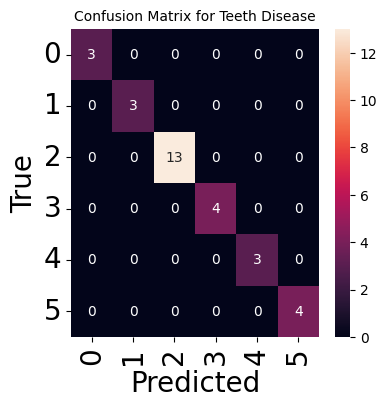

In [166]:
### Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)

y_pred = np.argmax(predDisease, axis=-1)

y_true=np.argmax(ActualDisease, axis=-1)

cm = confusion_matrix(ActualDisease, predDisease)

## Get Class Labels
#labels = le.classes_
class_names = [0,1,2,3,4,5]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(4, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix for Teeth Disease', fontsize=10)


In [163]:
import numpy as np
import pandas as pd
ActualDiseases=pd.DataFrame(ActualDisease)
predDiseases=pd.DataFrame(predDisease)


In [165]:
ActualDiseases.to_csv('D:\\teeth\\ActualDiseases.csv')
predDiseases.to_csv('D:\\teeth\\predDiseases.csv')


In [180]:
for i in range(0,29):
    print(ActualTreatment[i] + "   "  + PredictedTreatment[i])



mouthwash   mouthwash
mouthwash   mouthwash
mouthwash   mouthwash
mouthwash   mouthwash
Brush your teeth with warm water   Brush your teeth with warm water
Brush your teeth with warm water   Brush your teeth with warm water
Brush your teeth with warm water   Brush your teeth with warm water
Chew sugar-free gum   Answer is not available in the context
Chew sugar-free gum   Chew sugar-free gum
Chew sugar-free gum   Chew sugar-free gum
Cryotherapy   Cryotherapy
Cryotherapy   Answer is not available in the context
Cryotherapy   Cryotherapy
Eat a well balanced diet   Answer is not available in the context
Eat a well balanced diet   Eat a well balanced diet
Eat a well balanced diet   Answer is not available in the context
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
Tooth polishing   Tooth polishing
To

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ActualTreatment, PredictedTreatment)

In [182]:
cm

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0],
       [ 2,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  4]], dtype=int64)

In [184]:
from sklearn.metrics import classification_report
print(classification_report(ActualTreatment, PredictedTreatment))


                                        precision    recall  f1-score   support

Answer is not available in the context       0.00      0.00      0.00         0
      Brush your teeth with warm water       1.00      1.00      1.00         3
                   Chew sugar-free gum       1.00      0.67      0.80         3
                           Cryotherapy       1.00      0.67      0.80         3
              Eat a well balanced diet       1.00      0.33      0.50         3
                       Tooth polishing       1.00      1.00      1.00        13
                             mouthwash       1.00      1.00      1.00         4

                              accuracy                           0.86        29
                             macro avg       0.86      0.67      0.73        29
                          weighted avg       1.00      0.86      0.91        29



C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix for Teeth Disease')

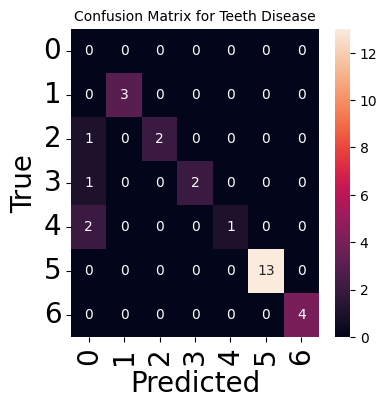

In [186]:
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)

y_pred = np.argmax(PredictedTreatment, axis=-1)

y_true=np.argmax(ActualTreatment, axis=-1)

cm = confusion_matrix(ActualTreatment, PredictedTreatment)

## Get Class Labels
#labels = le.classes_
class_names = [0,1,2,3,4,5,6]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(4, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix for Teeth Disease', fontsize=10)

In [187]:
import numpy as np
import pandas as pd
ActualTreatment=pd.DataFrame(ActualTreatment)
PredictedTreatment=pd.DataFrame(PredictedTreatment)

In [188]:
ActualTreatment.to_csv('D:\\teeth\\ActualTreatment.csv')
PredictedTreatment.to_csv('D:\\teeth\\PredictedTreatment.csv')

In [226]:
import pandas as pd
# Read the contents of the file
file_path = r"D:\teeth\dataset\TestSetQAns.txt"  # Update with your file path
with open(file_path, 'r') as file:
    lines = file.readlines()
questions = []
answers = []
for line in lines:
    if '?' in line:
        questions.append(line.strip())
       
    else:
        answers.append(line.strip())
     


In [227]:
len(questions)

25

In [228]:
len(answers)

25

In [229]:
df = pd.DataFrame({'Question': questions, 'Answer': answers})

In [230]:

df.to_csv(r"D:\teeth\dataset\TestSetQA.csv", index=False)

In [231]:
predAns = []
for i in range(0, 25):
    try:
        print(i)
        print(questions[i])
        ans = Response(questions[i])
        print(ans)
        predAns.append(ans)
    except Exception as e:
        print(f"An error occurred: {e}")
        print("No Answer")
        predAns.append("No Answer")


0
What should you do if you have a toothache while waiting for a dentist appointment?
Rinse your mouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain reliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that you have an abscess, a more serious problem. See your dentist as soon as possible. You may need  antibiotics  as well as other treatments.
1
What are the options for whitening stained teeth?
Your dentist can use a whitening agent and a special light. Or you can bleach them at home with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste and whitening rinses, only remove surface stains.
2
How can you prevent cavities?
    Brush your teeth at least twice a day with a fluoride toothpaste, limit snacks, floss daily, rinse with a fluoride mouthwash, and keep up with your dental appointments. Ask your dentist if you could benefit from a sealant.
3

Some dental conditions can lead to grinding. These include:
- A new filling or crown that is higher than your other teeth
- An abnormal bite
Some persons suffer from bruxism when they have a sleep disorder, are stressed, or are dealing with anxiety. Treating these underlying issues could help to ease or stop your grinding.
12
What problems can wisdom teeth cause?
Wisdom teeth can cause cavities, damage to neighboring teeth, and gum disease.
13
What should you do if there's no room to floss between your teeth?
Answer is not available in the context
14
Can grills cause dental problems?
Yes, grills can cause dental problems such as damage to the teeth and irritation to the mouth.
15
What causes tooth decay?
Tooth decay occurs when bacteria form a film, called plaque, on the surface of teeth. The bacteria produce acids from the sugars in food. The acids eat away at and permanently damage the enamel, or outer layer, of the tooth. The acids then start working on the softer dentin layer benea

Bad breath can be caused by several different factors, including:

• Poor oral hygiene
• Dry mouth
• Medication
• Infection
• Acid reflux
• Cancer
One or more of the foods you eat could also be the cause of your halitosis. Spices such as garlic and onion are common culprits.
18
What are some treatments for sensitive teeth?
There are kinds of toothpaste and mouthwashes meant specifically for use with sensitive teeth. Your dentist might also recommend a fluoride treatment, crown, gum graft, or a root canal. The chosen treatment depends on the severity of your case.
19
What causes cracked or broken teeth?
Cracked or broken teeth are most often caused by:

• Injury
• Chewing hard foods
• Mouth piercings
• Grinding of teeth while you sleep
20
How can you treat receding gums?
Dental care for receding gums includes a thorough cleaning of your teeth by a dental professional. You may also be shown proper brushing techniques. Severe cases may need to be treated with a gum graft or other form of 

Causes of dry mouth include cancer treatments, salivary gland disease, nerve damage, and diabetes. HIV/AIDs and certain medications can also bri ng on dry mouth and dry throat.

You can relieve dry mouth and dry throat by taking sips of water throughout the day. You should also avoid substances that are known to be drying. These include alcohol, tobacco, caffeine, and sweets.
24
What can cause teeth grinding (bruxism) and how can it be treated?
Teeth grinding (bruxism) can be caused by stress, misaligned teeth, or sleep issues. It can be treated with a mouth guard at night or meditation, exercise, or other ways to curb stress during the day.


In [233]:
predAns
        

['Rinse your mouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain reliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that you have an abscess, a more serious problem. See your dentist as soon as possible. You may need  antibiotics  as well as other treatments.',
 'Your dentist can use a whitening agent and a special light. Or you can bleach them at home with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste and whitening rinses, only remove surface stains.',
 '    Brush your teeth at least twice a day with a fluoride toothpaste, limit snacks, floss daily, rinse with a fluoride mouthwash, and keep up with your dental appointments. Ask your dentist if you could benefit from a sealant.',
 'A crown or bonding with a strong resin material to replace the area that chipped',
 'An adult tooth that doesn\'t come in properly is "impacted." It usually 

In [234]:
answers

['Rinse with warm water, floss, and take an over-the-counter pain reliever.',
 'Whitening at the dentist, at-home bleaching, or using whitening toothpaste and rinses.',
 'Brush twice a day with fluoride toothpaste, floss daily, limit snacks, rinse with fluoride mouthwash, and attend dental appointments.',
 'Crown, bonding with resin, or root canal followed by a veneer or crown.',
 "An adult tooth that doesn't come in properly, often stuck against another tooth, bone, or soft tissue.",
 'Chew on the other side until you see a dentist, who may recommend a crown or, if the crack is severe, a root canal and crown or tooth extraction.',
 'Cavities, worn enamel, gum disease, root infection, cracked tooth, worn-down crown or fillings, enamel erosion, and receding gums.',
 'Having extra teeth beyond the usual 32 adult teeth.',
 'Orthodontics, such as braces, aligners, and retainers.',
 'Orthodontics to move teeth closer together, or cosmetic solutions like veneers or bonding.',
 'Gums that ble

In [241]:
df = pd.DataFrame({
    'Predicted Answer': predAns,
    'Actual Ans': answers
})

# Save to CSV
df.to_csv('D:\\teeth\\ActualPredictedAns.csv', index=False)

In [242]:
import pandas as pd
df = pd.read_csv('D:\\teeth\\ActualPredictedAns.csv')

In [243]:
from rouge_score import rouge_scorer
def calculate_similarity(str1, str2):
    # Split the strings into words
    str2 = str2.replace(',', '')
    str2 = str2.replace('.', '')
    str1 = str1.replace(',', '')
    str1 = str1.replace('.', '')
    words_str1 = set(str1.split())
    words_str2 = set(str2.split())
    words_str1 = {word.lower() for word in words_str1 if not isinstance(word, float)}
    words_str2 = {word.lower() for word in words_str2 if not isinstance(word, float)}
    # Check if all words from str1 are present in str2
    if words_str1.issubset(words_str2):
        return 100
    
    # Calculate the intersection of words between the two strings
    common_words = words_str1.intersection(words_str2)
    
    # Calculate the percentage of words from str1 present in str2
    similarity_percentage = (len(common_words) / len(words_str1)) * 100
    
    return similarity_percentage

In [244]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge1p=[]
rouge1r=[]
rouge1f=[]
rouge2p=[]
rouge2r=[]
rouge2f=[]
rougeLp=[]
rougeLr=[]
rougeLf=[]
simlarity=[]
pred=[]
actual=[]
i=0
for p in df['Predicted Answer']:
    print("============" + str(i))
    print("Predicted")
    print(p)
    print("Actual")
    print(df['Actual Ans'][i])
    if( str(p) != "nan"):
        scores = scorer.score(df['Actual Ans'][i], p)
        rouge1_precision = scores['rouge1'].precision
        rouge1_recall = scores['rouge1'].recall
        rouge1_f1score = scores['rouge1'].fmeasure
        rouge2_precision = scores['rouge2'].precision
        rouge2_recall = scores['rouge2'].recall
        rouge2_f1score = scores['rouge2'].fmeasure
        rougeL_precision = scores['rougeL'].precision
        rougeL_recall = scores['rougeL'].recall
        rougeL_f1score = scores['rougeL'].fmeasure
        print("ROUGE-1 Precision:", rouge1_precision)
        print("ROUGE-1 Recall:", rouge1_recall)
        print("ROUGE-1 F1Score:", rouge1_f1score)
        print("ROUGE-2 Precision:", rouge2_precision)
        print("ROUGE-2 Recall:", rouge2_recall)
        print("ROUGE-L Precision:", rougeL_precision)
        print("ROUGE-L Recall:", rougeL_recall)
        rouge1p.append(rouge1_precision)
        rouge1r.append(rouge1_recall)
        rouge1f.append(rouge1_f1score)
        rouge2p.append(rouge2_precision)
        rouge2r.append(rouge2_recall)
        rouge2f.append(rouge2_f1score)
        rougeLp.append(rougeL_precision)
        rougeLr.append(rougeL_recall)
        rougeLf.append(rougeL_f1score)
        sim=calculate_similarity(df['Actual Ans'][i], p)
        print(sim)
        simlarity.append(sim)
    else:
        print("ROUGE-1 Precision:", 0)
        print("ROUGE-1 Recall:", 0)
        print("ROUGE-2 Precision:", 0)
        print("ROUGE-2 Recall:", 0)
        print("ROUGE-L Precision:", 0)
        print("ROUGE-L Recall:", 0)
        rouge1p.append(0)
        rouge1r.append(0)
        rouge1f.append(0)
        rouge2p.append(0)
        rouge2r.append(0)
        rouge2f.append(0)
        rougeLp.append(0)
        rougeLr.append(0)
        rougeLf.append(0)
        
        print(0)
        simlarity.append(0)
        sim=0
    if sim>=0.5:
        pred.append(1)
        actual.append(1)
    else:
        pred.append(0)
        actual.append(1)
      
    i=i+1

============0
Predicted
Rinse your mouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain reliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that you have an abscess, a more serious problem. See your dentist as soon as possible. You may need  antibiotics  as well as other treatments.
Actual
Rinse with warm water, floss, and take an over-the-counter pain reliever.
ROUGE-1 Precision: 0.19696969696969696
ROUGE-1 Recall: 1.0
ROUGE-1 F1Score: 0.3291139240506329
ROUGE-2 Precision: 0.15384615384615385
ROUGE-2 Recall: 0.8333333333333334
ROUGE-L Precision: 0.19696969696969696
ROUGE-L Recall: 1.0
90.9090909090909
============1
Predicted
Your dentist can use a whitening agent and a special light. Or you can bleach them at home with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste and whitening rinses, only remove surface stains.
Actual
Whitening at the 

In [245]:
ScoreDF = pd.DataFrame({'Rouge-1P': rouge1p, 'Rouge-1R': rouge1r,'Rouge-1f': rouge1f,'Rouge-2P': rouge2p, 'Rouge-2r': rouge2r,'Rouge-2f': rouge2f,'Rouge-LP': rougeLp, 'Rouge-Lr': rougeLr,'Rouge-Lf': rougeLf,' Similarity': simlarity})
ScoreDF.to_csv(r"D:\teeth\ActualPredScore.csv", index=False)

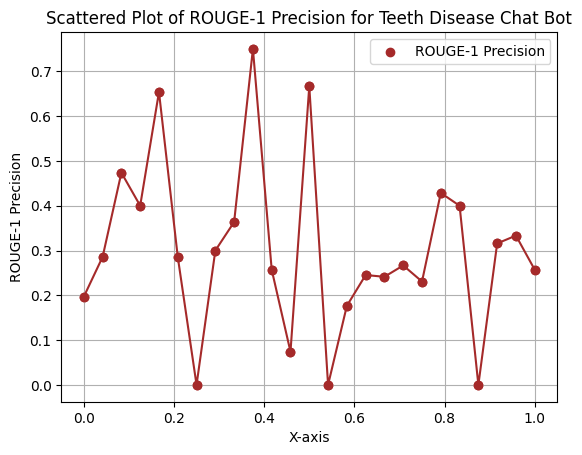

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))

# Plotting scatter plot with markers
plt.scatter(x, rouge1p, label='ROUGE-1 Precision', color='brown', marker='o')
plt.plot(x, rouge1p, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel('ROUGE-1 Precision')
plt.title('Scattered Plot of ROUGE-1 Precision for Teeth Disease Chat Bot')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


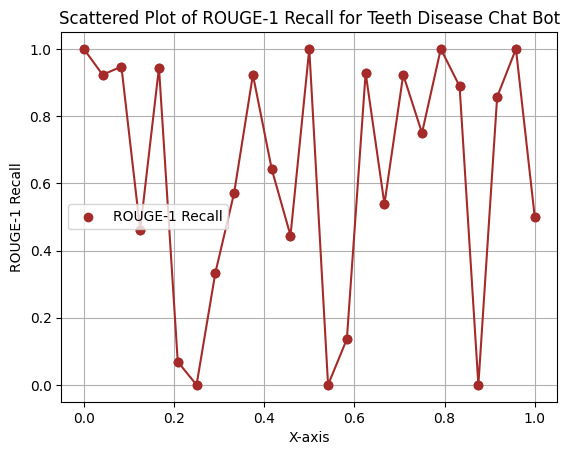

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rouge1r
ylabel= "ROUGE-1 Recall"
title="Scattered Plot of ROUGE-1 Recall for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

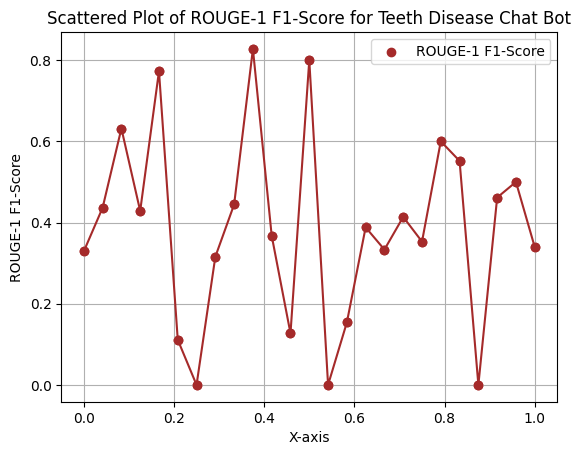

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rouge1f
ylabel= "ROUGE-1 F1-Score"
title="Scattered Plot of ROUGE-1 F1-Score for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


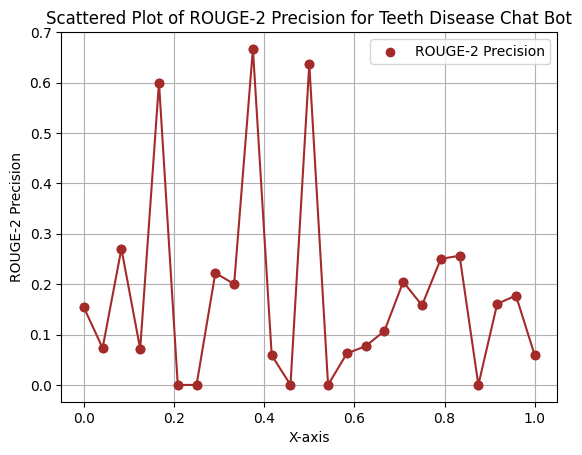

In [261]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rouge2p
ylabel= "ROUGE-2 Precision"
title="Scattered Plot of ROUGE-2 Precision for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


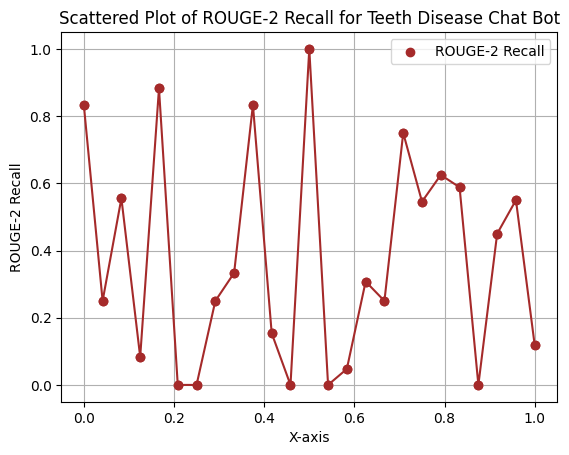

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rouge2r
ylabel= "ROUGE-2 Recall"
title="Scattered Plot of ROUGE-2 Recall for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

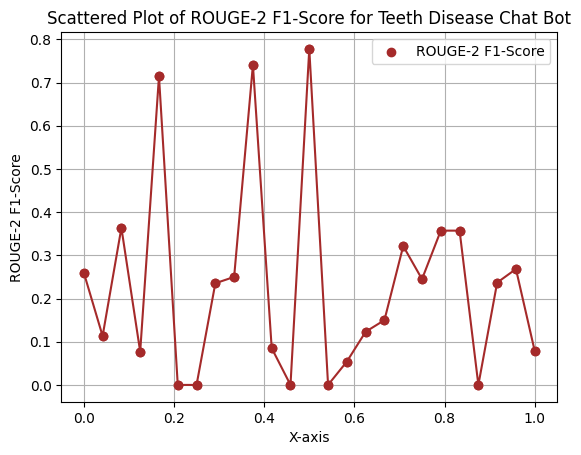

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rouge2f
ylabel= "ROUGE-2 F1-Score"
title="Scattered Plot of ROUGE-2 F1-Score for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

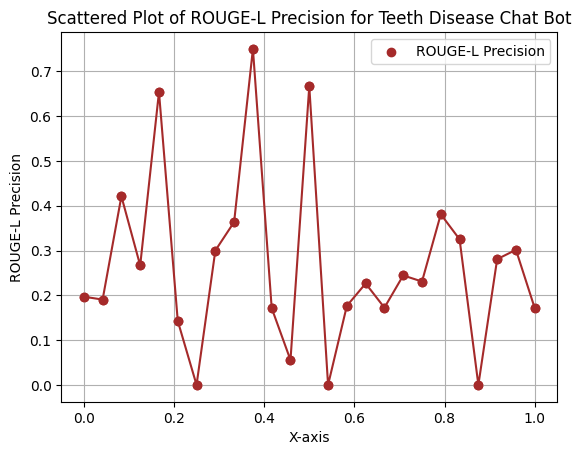

In [258]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rougeLp
ylabel= "ROUGE-L Precision"
title="Scattered Plot of ROUGE-L Precision for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

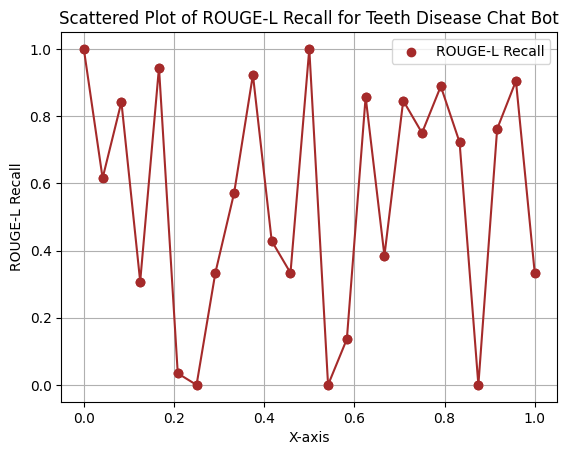

In [257]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rougeLr
ylabel= "ROUGE-L Recall"
title="Scattered Plot of ROUGE-L Recall for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

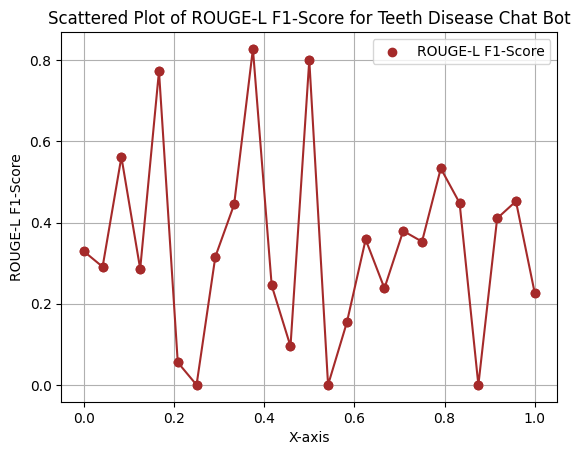

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(rouge1p))
y=rougeLf
ylabel= "ROUGE-L F1-Score"
title="Scattered Plot of ROUGE-L F1-Score for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [265]:
actual

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [267]:
pred

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [271]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, pred)

In [272]:
cm

array([[ 0,  0],
       [ 3, 22]], dtype=int64)

In [274]:

from sklearn.metrics import classification_report
print(classification_report(actual, pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.94        25

    accuracy                           0.88        25
   macro avg       0.50      0.44      0.47        25
weighted avg       1.00      0.88      0.94        25



C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


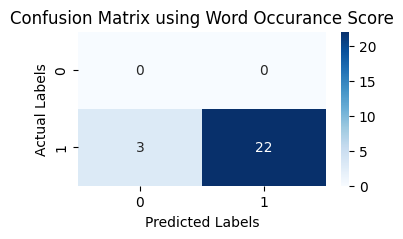

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(actual, pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix using Word Occurance Score')
plt.show()


In [281]:
import spacy

nlp=spacy.load('en_core_web_md')

In [282]:


sentence1 = "Eating apples is healthy."
sentence2 = "Consuming fruits like apples promotes good health."

doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

similarity_score = doc1.similarity(doc2)
print(f"Semantic similarity score: {similarity_score}")


Semantic similarity score: 0.7761863699741858


In [283]:
df = pd.read_csv('D:\\teeth\\ActualPredictedAns.csv')

In [289]:
i=0
simSpacy=[]
for p in df['Predicted Answer']:
    print("============" + str(i))
    print("Predicted")
    print(p)
    print("Actual")
    print(str(df['Actual Ans'][i]))
    if( str(p) != "nan"):
        doc1 = nlp(str(p))
        doc2 = nlp(str(df['Actual Ans'][i]))
        similarity_score = doc1.similarity(doc2)
        print("similarity_score" + str(similarity_score))
        simSpacy.append(similarity_score)
    else:
        print("similarity_score" + str(0))
        simSpacy.append(0)
    i=i+1

============0
Predicted
Rinse your mouth with warm water, floss to remove food caught between teeth, and take an over -the-counter pain reliever.  If you notice swelling or pus around the tooth, or if you have a  fever, that could be a sign that you have an abscess, a more serious problem. See your dentist as soon as possible. You may need  antibiotics  as well as other treatments.
Actual
Rinse with warm water, floss, and take an over-the-counter pain reliever.
similarity_score0.8165060609057834
============1
Predicted
Your dentist can use a whitening agent and a special light. Or you can bleach them at home with a plastic tray and gel from your dentist or a store. The simplest choice, whitening toothpaste and whitening rinses, only remove surface stains.
Actual
Whitening at the dentist, at-home bleaching, or using whitening toothpaste and rinses.
similarity_score0.8271390310393953
============2
Predicted
    Brush your teeth at least twice a day with a fluoride toothpaste, limit snack

In [290]:
simSpacy

[0.8165060609057834,
 0.8271390310393953,
 0.9059849100730505,
 0.8647982646884824,
 0.9196151088247597,
 0.7459925305497206,
 0.6343902466953931,
 0.7575130137382465,
 0.8944926550938631,
 0.9670054784052773,
 0.7024687483737799,
 0.7731891993020208,
 0.9558134589227254,
 0.5687063694016286,
 0.8076805055736288,
 0.9235891131618137,
 0.8623542663459678,
 0.7551510909239867,
 0.8595561690904452,
 0.7123404702385525,
 0.9169810832075643,
 -0.11839304569419615,
 0.9280846835057691,
 0.8928113637642315,
 0.91003251325574]

In [292]:
spacyScores = pd.DataFrame({'Spacy Scores': simSpacy})
spacyScores.to_csv(r"D:\teeth\spacyScores.csv", index=False)

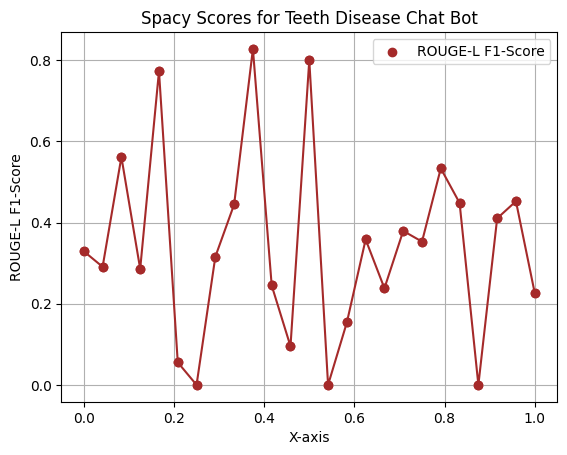

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array containing ROUGE-1 precision values between 0 and 1

# Generating corresponding x-values
x = np.linspace(0, 1, len(spacyScores))
y=rougeLf
ylabel= "ROUGE-L F1-Score"
title="Spacy Scores for Teeth Disease Chat Bot"
# Plotting scatter plot with markers
plt.scatter(x, y, label=ylabel, color='brown', marker='o')
plt.plot(x, y, color='brown', marker='o')  
# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [302]:
predSpacy=[]
actualSpacy=[]
for sim in simSpacy:
    if sim>=0.80:
        predSpacy.append(1)
        actualSpacy.append(1)
    else:
        predSpacy.append(0)
        actualSpacy.append(1)

In [303]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actualSpacy, predSpacy)


In [304]:
cm

array([[ 0,  0],
       [ 9, 16]], dtype=int64)

In [305]:
from sklearn.metrics import classification_report
print(classification_report(actualSpacy, predSpacy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        25

    accuracy                           0.64        25
   macro avg       0.50      0.32      0.39        25
weighted avg       1.00      0.64      0.78        25



C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


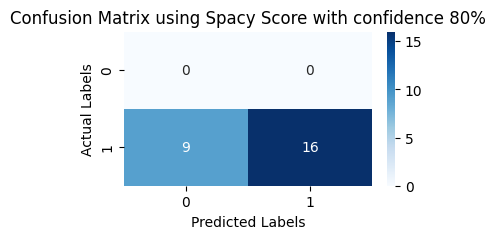

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(actualSpacy, predSpacy)

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix using Spacy Score with confidence 80%')
plt.show()

In [308]:
predSpacy=[]
actualSpacy=[]
for sim in simSpacy:
    if sim>=0.70:
        predSpacy.append(1)
        actualSpacy.append(1)
    else:
        predSpacy.append(0)
        actualSpacy.append(1)

In [309]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actualSpacy, predSpacy)

In [310]:
cm

array([[ 0,  0],
       [ 3, 22]], dtype=int64)

In [311]:
from sklearn.metrics import classification_report
print(classification_report(actualSpacy, predSpacy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.94        25

    accuracy                           0.88        25
   macro avg       0.50      0.44      0.47        25
weighted avg       1.00      0.88      0.94        25



C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


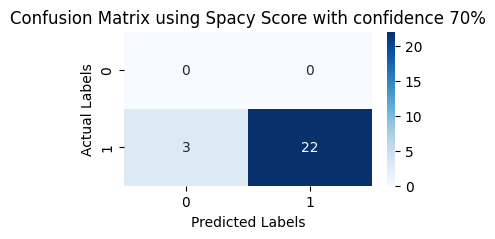

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(actualSpacy, predSpacy)

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix using Spacy Score with confidence 70%')
plt.show()

In [313]:
predSpacy=[]
actualSpacy=[]
for sim in simSpacy:
    if sim>=0.60:
        predSpacy.append(1)
        actualSpacy.append(1)
    else:
        predSpacy.append(0)
        actualSpacy.append(1)

In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actualSpacy, predSpacy)

In [315]:
cm

array([[ 0,  0],
       [ 2, 23]], dtype=int64)

In [316]:
from sklearn.metrics import classification_report
print(classification_report(actualSpacy, predSpacy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        25

    accuracy                           0.92        25
   macro avg       0.50      0.46      0.48        25
weighted avg       1.00      0.92      0.96        25



C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saqib\anaconda3\envs\GAI\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


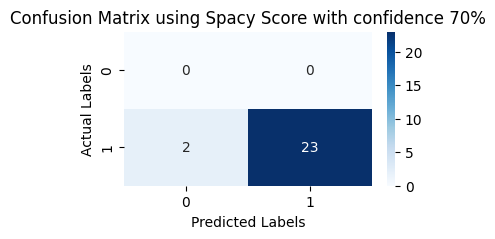

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(actualSpacy, predSpacy)

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix using Spacy Score with confidence 70%')
plt.show()